## Jumpman Exercises

In [1]:
import pandas as pd, requests
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../Postmates/data/analyze_me.csv')

In [3]:
df.shape

(5983, 18)

In [4]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [5]:
df.isna().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

### Data Cleaning

### Exploratory Data Analysis

In [7]:
df.pickup_place.describe()

count            5983
unique            898
top       Shake Shack
freq              311
Name: pickup_place, dtype: object

In [8]:
df['vehicle_type'].value_counts()

bicycle       4274
car           1215
walker         274
van             76
scooter         75
truck           48
motorcycle      21
Name: vehicle_type, dtype: int64

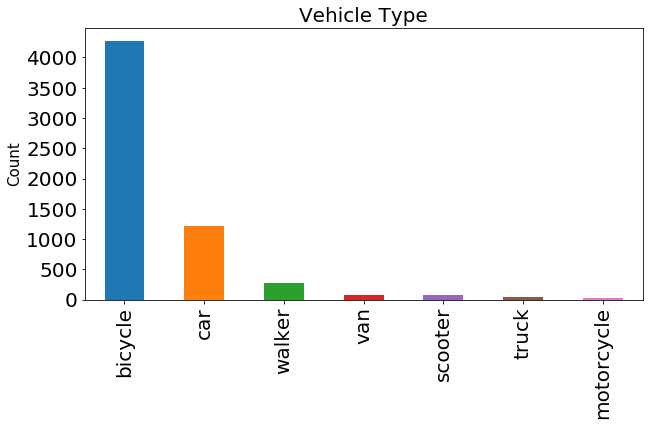

In [9]:
df['vehicle_type'].value_counts().plot.bar(x='transport', figsize=(10,5), fontsize=20, sort_columns=True)
plt.ylabel('Count', fontsize=15)
plt.title('Vehicle Type', fontsize=20)
plt.savefig('vehicle_type.png', bbox_inches='tight',transparent=True)

In [10]:
df['item_name'].value_counts()[:10]

Fries                  76
Cheese Fries           35
Shackburger            31
Chicken                30
Shack Burger           29
B'day Cake Truffles    26
Hamburger              26
Classic Beef           24
ShackBurger            24
Cheeseburger           23
Name: item_name, dtype: int64

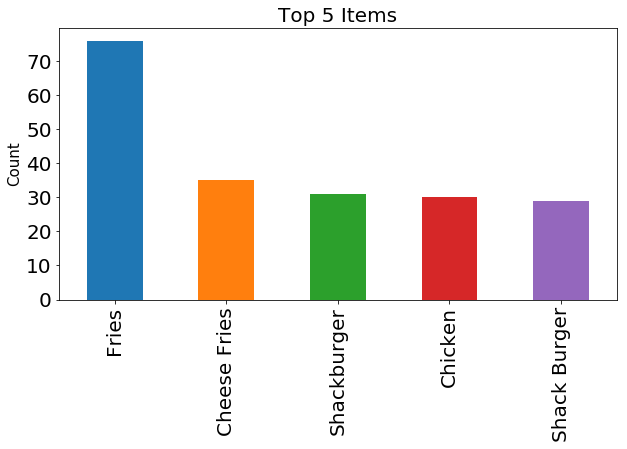

In [11]:
df['item_name'].value_counts()[:5].plot.bar(x='transport', figsize=(10,5), fontsize=20, sort_columns=True)
plt.ylabel('Count', fontsize=15)
plt.title('Top 5 Items', fontsize=20)
plt.savefig('Top5.png', bbox_inches='tight',transparent=True)

In [12]:
df['place_category'].value_counts()[:25]

Italian           504
Burger            454
Japanese          433
American          405
Chinese           332
Dessert           315
Sushi             253
Salad             206
Grocery Store     187
Mexican           178
Bakery            140
BBQ               134
Pizza             106
Juice Bar          99
Indian             91
Donut              90
Fast Food          83
Seafood            81
Vegetarian         73
Middle Eastern     70
Mediterranean      69
Drug Store         68
Gluten-Free        68
Deli               65
Coffee             61
Name: place_category, dtype: int64

In [13]:
df['pickup_place'].value_counts()[:20]

Shake Shack                              311
Momofuku Milk Bar                        186
The Meatball Shop                        184
Blue Ribbon Sushi                        151
sweetgreen                               149
Blue Ribbon Fried Chicken                133
Whole Foods Market                       119
Parm                                     102
RedFarm Broadway                          93
Mighty Quinn's BBQ                        90
Chipotle Mexican Grill $1.99 Delivery     80
Momofuku Noodle Bar                       74
Hu Kitchen                                68
Trader Joe's                              68
TAO                                       67
Han Dynasty                               66
Sushi of Gari 46                          64
Duane Reade                               64
McDonald's                                62
RedFarm Hudson                            60
Name: pickup_place, dtype: int64

## jumpman Data

In [14]:
df['delivery_id'].nunique()

5214

In [52]:
df['delivery_id'].value_counts()[:5]

1460296    5
1286826    4
1319971    4
1475127    4
1343610    4
Name: delivery_id, dtype: int64

In [15]:
df['delivery_id'].mode()

0    1460296
dtype: int64

In [16]:
df['delivery_id'].value_counts().mean()

1.1474875335634829

### Customer Data

In [17]:
df['customer_id'].nunique()

3192

In [18]:
df['customer_id'].value_counts()[:20]

369272    28
52832     23
275689    17
125123    16
91817     16
58898     16
100889    14
115610    13
250494    13
301032    12
276192    12
47440     12
64153     12
259341    12
60052     12
270525    11
95644     11
59673     11
66373     11
121706    11
Name: customer_id, dtype: int64

In [19]:
df['customer_id'].value_counts().mean()

1.87437343358396

In [20]:
top_10_df_new = df['customer_id'].value_counts()

In [21]:
top_10_df_new.head()

369272    28
52832     23
275689    17
125123    16
91817     16
Name: customer_id, dtype: int64

In [22]:
top_10_df_new.columns = ['customer_id', 'orders']

In [23]:
customer_index= df['customer_id']== 369272

In [24]:
customer_df = df[customer_index]

In [25]:
customer_df['pickup_place'].value_counts()

Levain Bakery                    7
Doughnut Plant Chelsea           4
Blue Ribbon Sushi Bar & Grill    3
Blue Ribbon Sushi                3
BabyCakes NYC                    2
Balthazar Boulangerie            2
Magnolia Bakery                  2
Candle Cafe West                 1
Flex Mussels                     1
Ess-a-Bagel                      1
Baked By Melissa                 1
Momofuku Milk Bar                1
Name: pickup_place, dtype: int64

## Boolean Indexes

### Make an Index

In [26]:
shake_index = df['pickup_place'] == 'Shake Shack'

### Put Index into a Data Frame

In [27]:
shake_df = df[shake_index] # selects the "True" rows recorded in the boolean

In [28]:
shake_df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1.0,Flat-Top Dogs,NaN,40.780826,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217
48,1320822,149508,43955,bicycle,Shake Shack,Burger,Cheese Fries,1.0,Fries,NaN,40.715279,-74.014860,40.716168,-74.003693,2014-10-08 21:18:11.900324,2014-10-08 21:28:15.142224,2014-10-08 21:47:35.029385,2014-10-08 21:54:36.734336
64,1414452,148033,128139,car,Shake Shack,Burger,NaN,NaN,NaN,NaN,40.682770,-73.976532,40.693256,-73.966173,2014-10-21 14:57:29.338613,2014-10-21 15:30:02.259968,2014-10-21 15:31:21.050095,2014-10-21 15:37:44.276996
137,1299559,148327,118093,scooter,Shake Shack,Burger,Fries,1.0,Fries,NaN,40.692146,-73.988865,40.701972,-73.987036,2014-10-05 12:30:23.27789,2014-10-05 13:07:23.30729,2014-10-05 13:26:13.134353,2014-10-05 13:35:38.318512


### Popular Items at Shake Shack

In [29]:
shake_df['item_name'].value_counts()[:15]

Fries             60
Cheese Fries      33
Shackburger       31
Shack Burger      29
ShackBurger       24
Hamburger         21
Fountain Soda     17
Shake             15
Original Shake    12
Hot Dog            8
Smoke Shack        8
Shack Stack        4
SmokeShack         4
Chicken Dog        4
DogMeister         3
Name: item_name, dtype: int64

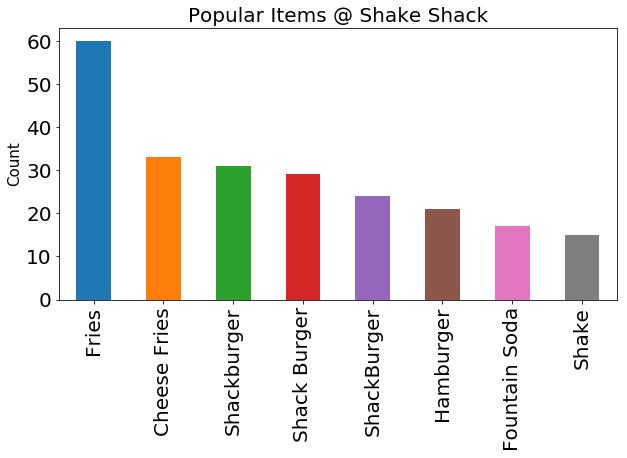

In [30]:
shake_df['item_name'].value_counts()[:8].plot.bar(x='item', figsize=(10,5), fontsize=20, sort_columns=True)
plt.ylabel('Count', fontsize=15)
plt.title('Popular Items @ Shake Shack', fontsize=20)
plt.savefig('plotname.png', bbox_inches='tight',transparent=True)

## Time Analysis

In [31]:
df.dtypes

delivery_id                              int64
customer_id                              int64
jumpman_id                               int64
vehicle_type                            object
pickup_place                            object
place_category                          object
item_name                               object
item_quantity                          float64
item_category_name                      object
how_long_it_took_to_order               object
pickup_lat                             float64
pickup_lon                             float64
dropoff_lat                            float64
dropoff_lon                            float64
when_the_delivery_started               object
when_the_Jumpman_arrived_at_pickup      object
when_the_Jumpman_left_pickup            object
when_the_Jumpman_arrived_at_dropoff     object
dtype: object

In [32]:
df['when_the_delivery_started']=pd.to_datetime(df.when_the_delivery_started)
df['when_the_Jumpman_arrived_at_pickup']=pd.to_datetime(df.when_the_Jumpman_arrived_at_pickup)
df['when_the_Jumpman_left_pickup']=pd.to_datetime(df.when_the_Jumpman_left_pickup)
df['when_the_Jumpman_arrived_at_dropoff']=pd.to_datetime(df.when_the_Jumpman_arrived_at_dropoff)

In [33]:
df.dtypes

delivery_id                                     int64
customer_id                                     int64
jumpman_id                                      int64
vehicle_type                                   object
pickup_place                                   object
place_category                                 object
item_name                                      object
item_quantity                                 float64
item_category_name                             object
how_long_it_took_to_order                      object
pickup_lat                                    float64
pickup_lon                                    float64
dropoff_lat                                   float64
dropoff_lon                                   float64
when_the_delivery_started              datetime64[ns]
when_the_Jumpman_arrived_at_pickup     datetime64[ns]
when_the_Jumpman_left_pickup           datetime64[ns]
when_the_Jumpman_arrived_at_dropoff    datetime64[ns]
dtype: object

### Day of Week

### Start to Drop Off

In [34]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [35]:
df['when_the_Jumpman_arrived_at_dropoff'].dt.minute.head() - df['when_the_delivery_started'].dt.minute.head()

0     1
1     1
2   -35
3   -22
4    41
dtype: int64

In [36]:
df['diff_minutes'] = df['when_the_Jumpman_arrived_at_dropoff'] - df['when_the_delivery_started']
df['diff_minutes']=df['diff_minutes']/np.timedelta64(1,'m')

In [37]:
df['day_of_week'] = df['when_the_delivery_started'].dt.weekday_name

In [38]:
df['day_of_week'].describe()

count       5983
unique         7
top       Sunday
freq        1119
Name: day_of_week, dtype: object

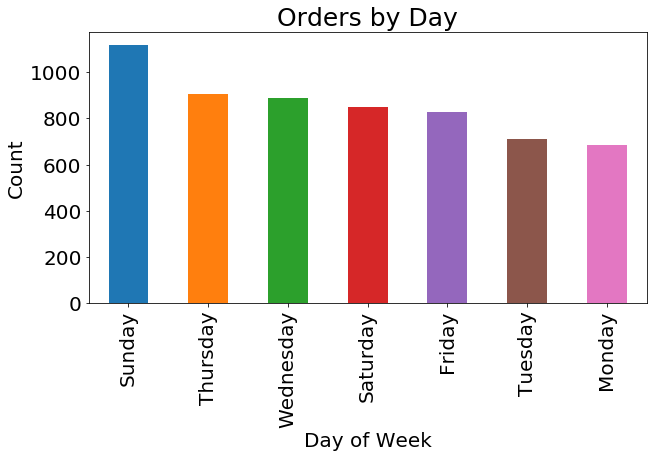

In [50]:
df['day_of_week'].value_counts().plot.bar(figsize=(10,5), fontsize=20)
plt.xlabel('Day of Week', size=20) 
plt.ylabel('Count', size = 20)
plt.title('Orders by Day', size=25)
plt.savefig('days.png', bbox_inches='tight',transparent=True)

In [ ]:
df['diff_minutes'].head()

In [ ]:
df['diff_minutes'].describe()

In [ ]:
plt.hist(df['diff_minutes'],range=[0, 100])
plt.xlabel('Minutes') 
plt.ylabel('Count')
plt.title('Wait Times', size=16)
plt.savefig('wait-times.png', bbox_inches='tight',transparent=True)